In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('.')

['train_images.pkl',
 'train_labels.pkl',
 'visualized_data.ipynb',
 'SampleSubmission.csv',
 '.ipynb_checkpoints',
 'training.csv',
 'test_images.pkl',
 'test.csv',
 'data_load.ipynb',
 'IdLookupTable.csv']

In [2]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [3]:
train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True

train_data.isnull().any().value_counts()

train_data.shape

imag = []
for i in range(0,train_data.shape[0]):
    img = train_data['Image'][i].split(' ')
    img = np.array(['0' if x == '' else x for x in img])
    img = img.reshape(-1,96,96,1)
    imag.append(img)
    

img

array([[[['53'],
         ['62'],
         ['67'],
         ...,
         ['120'],
         ['117'],
         ['97']],

        [['53'],
         ['64'],
         ['70'],
         ...,
         ['114'],
         ['113'],
         ['96']],

        [['60'],
         ['70'],
         ['77'],
         ...,
         ['106'],
         ['108'],
         ['94']],

        ...,

        [['41'],
         ['56'],
         ['77'],
         ...,
         ['159'],
         ['155'],
         ['153']],

        [['41'],
         ['48'],
         ['67'],
         ...,
         ['159'],
         ['157'],
         ['157']],

        [['46'],
         ['44'],
         ['56'],
         ...,
         ['158'],
         ['158'],
         ['159']]]], dtype='<U3')

In [4]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [7]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

In [8]:
X_train.shape

(7049, 96, 96, 1)

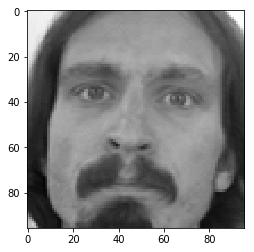

In [9]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [18]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [11]:
import pickle 


In [19]:
y_train.shape

(7049, 30)

In [15]:
pickle.dump(X_train,open("train_images.pkl","wb"))

pickle.dump(y_train,open("train_labels.pkl","wb"))

In [3]:
test_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True

test_data.isnull().any().value_counts()

test_data.shape

imag = []
for i in range(0,test_data.shape[0]):
    img = test_data['Image'][i].split(' ')
    img = np.array(['0' if x == '' else x for x in img])
    img = img.reshape(-1,96,96,1)
    imag.append(img)
    


In [4]:
test_data.isnull().any().value_counts()

False    2
dtype: int64

In [7]:
import pickle

In [13]:
X_test = np.array(imag)

X_test.shape

X_test = X_test.reshape(-1,96,96,1)


X_test.shape

pickle.dump(X_test,open("test_images.pkl","wb"))

In [15]:
test = test_data.drop('Image',axis = 1)

y_test = []
for i in range(0,test_data.shape[0]):
    y=test.iloc[i,:]

    y_test.append(y)
y_test = np.array(y_test,dtype = 'float')

In [17]:
y_test.shape

(1783, 1)

In [20]:
test.head()

,ImageId
0,1
1,2
2,3
3,4
4,5


In [21]:
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
